<a href="https://colab.research.google.com/github/MUKESHRAJMAHENDRAN/Deep-Learning--fastai/blob/main/fast_ai_vision_beg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fastai vision

In [ ]:
!pip install fastai --upgrade

In [ ]:
from fastai.vision.all import *

##Label Clssification(Binary)

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_22.jpg')...]

In [ ]:
files = (path/"images").ls()
files

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_22.jpg')...]

In [ ]:
files[0], files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg'))

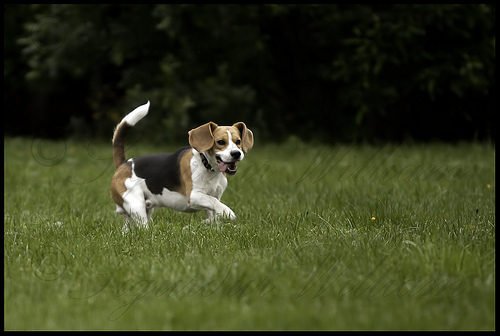

In [ ]:
img_1 = Image.open(files[0])
img_1

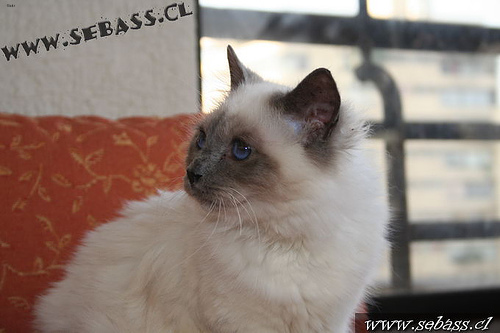

In [ ]:
img_2 = Image.open(files[6])
img_2

In [ ]:
files[0].name

'beagle_118.jpg'

In [ ]:
def label_func(filename):
  return "cat" if filename.name[0].isupper() else "dog"


In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items= get_image_files,
                 splitter = RandomSplitter(),
                 get_y = label_func,
                 item_tfms=Resize(224))

In [ ]:
dls = pets.dataloaders(path/"images")

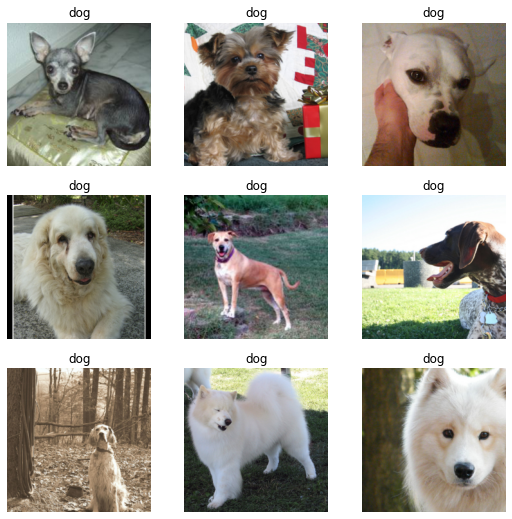

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

In [ ]:
learn.fine_tune(1)

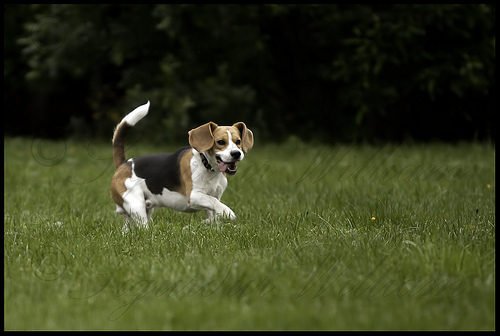

In [ ]:
img_1

In [ ]:
learn.predict(files[0])

('dog', TensorBase(1), TensorBase([9.4950e-07, 1.0000e+00]))

In [ ]:
files[6]

Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg')

In [ ]:
learn.predict(files[6])

('cat', TensorBase(0), TensorBase([1.0000e+00, 2.5362e-09]))

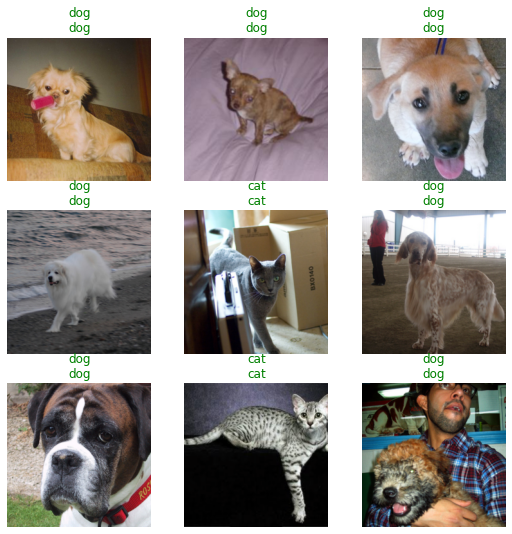

In [ ]:
learn.show_results()

##Classification of breeds

In [ ]:
path1 = untar_data(URLs.PETS)

In [ ]:
path1.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path1/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_22.jpg')...]

In [ ]:
breeds = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter = RandomSplitter(),
                   get_y = Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms())

In [ ]:
dls = breeds.dataloaders(path/"images")

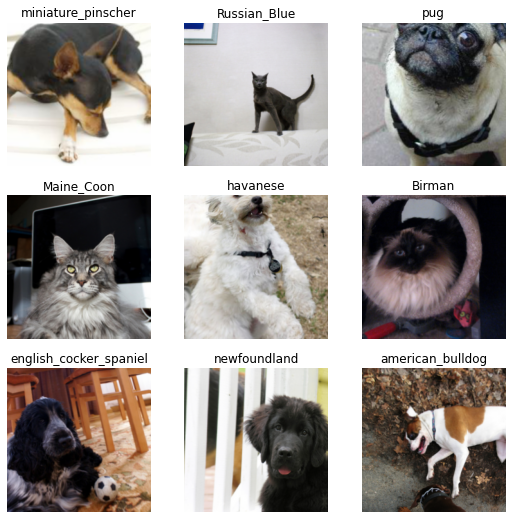

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

SuggestedLRs(valley=9.120108734350652e-05)

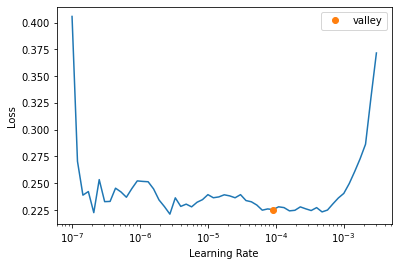

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 3e-3)

In [ ]:
inter = Interpretation.from_learner(learn)

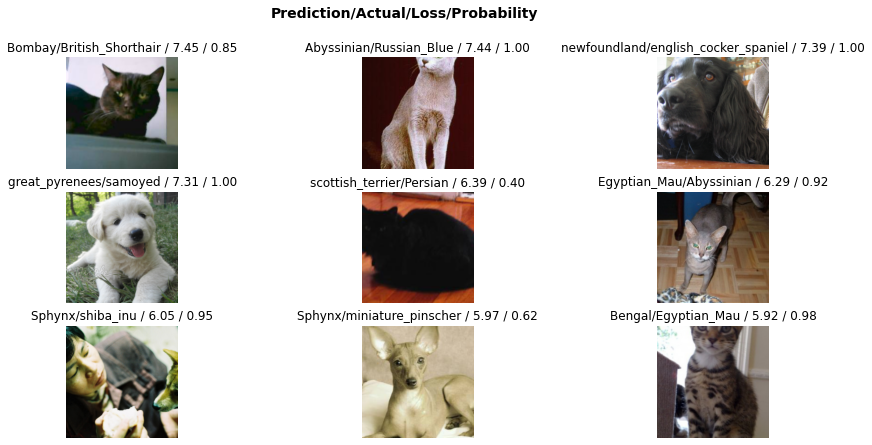

In [ ]:
inter.plot_top_losses(9, figsize=(15,7))

In [ ]:
learn.predict("/content/lab.jpeg")

('chihuahua',
 TensorBase(17),
 TensorBase([2.0105e-03, 3.7929e-04, 4.8099e-04, 3.8119e-04, 5.5882e-05, 2.0623e-04,
         1.2536e-04, 1.5358e-04, 7.7442e-05, 5.5552e-05, 1.1583e-04, 6.8577e-05,
         1.7409e-02, 1.3129e-02, 4.6320e-04, 3.1758e-01, 3.4223e-04, 5.1321e-01,
         1.7747e-03, 5.0280e-03, 8.9100e-02, 2.0683e-03, 6.7286e-04, 5.5797e-03,
         4.2719e-05, 5.5669e-04, 4.2984e-03, 2.5876e-03, 2.3298e-03, 5.9575e-03,
         1.0177e-04, 3.5071e-05, 3.9596e-04, 1.1950e-03, 3.9544e-03, 5.0203e-04,
         7.5741e-03]))

In [ ]:
learn.predict("/content/lab1.jpeg")

('american_pit_bull_terrier',
 TensorBase(13),
 TensorBase([5.2945e-02, 1.3670e-03, 3.1043e-04, 2.8238e-03, 1.3539e-04, 2.4019e-04,
         1.3955e-04, 3.5992e-04, 1.4664e-04, 2.9411e-04, 1.5062e-03, 1.1491e-03,
         9.1376e-03, 5.3564e-01, 2.6304e-04, 4.9090e-02, 1.0301e-02, 2.9634e-02,
         4.3278e-04, 2.9206e-03, 1.1825e-01, 1.2778e-02, 2.4197e-03, 2.7489e-02,
         1.1474e-03, 6.5922e-02, 5.2342e-03, 2.3769e-03, 9.0195e-04, 2.3510e-02,
         8.3289e-03, 2.6299e-04, 2.1557e-03, 1.0767e-02, 6.5060e-03, 9.0646e-03,
         4.0501e-03]))

If we train more epoch we will get higher results

In [ ]:
pip show fastai

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


##Multilabel_classification

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PASCAL_2007)

In [ ]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/segmentation')]

In [ ]:
df = pd.read_csv(path/"train.csv")

In [ ]:
df.head(10)

fname          labels  is_valid
0  000005.jpg           chair      True
1  000007.jpg             car      True
2  000009.jpg    horse person      True
3  000012.jpg             car     False
4  000016.jpg         bicycle      True
5  000017.jpg    person horse     False
6  000019.jpg             cat      True
7  000020.jpg             car      True
8  000021.jpg      dog person      True
9  000023.jpg  bicycle person     False

In [ ]:
pascal = DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                    splitter = ColSplitter(col = "is_valid"),
                    get_x = ColReader("fname", pref = (path/"train")),
                    get_y = ColReader("labels", label_delim=" "),
                    item_tfms = Resize(224),
                    batch_tfms = aug_transforms(size=224))

In [ ]:
dls = pascal.dataloaders(df)

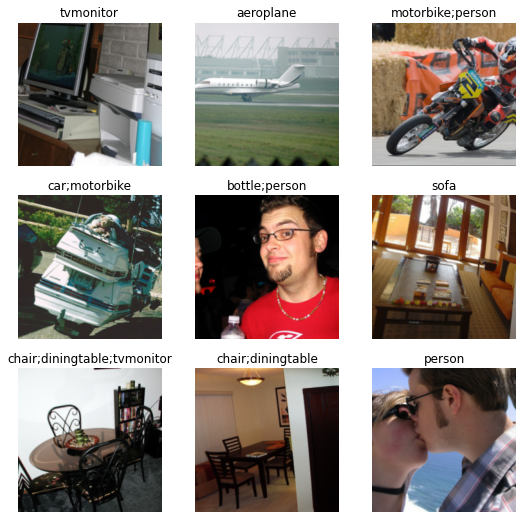

In [ ]:
dls.show_batch()

In [ ]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
learn = cnn_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0014454397605732083)

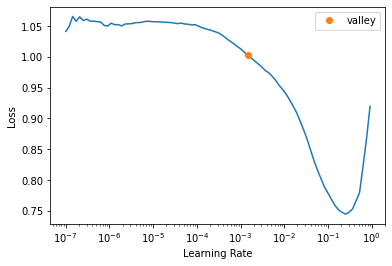

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 3e-2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


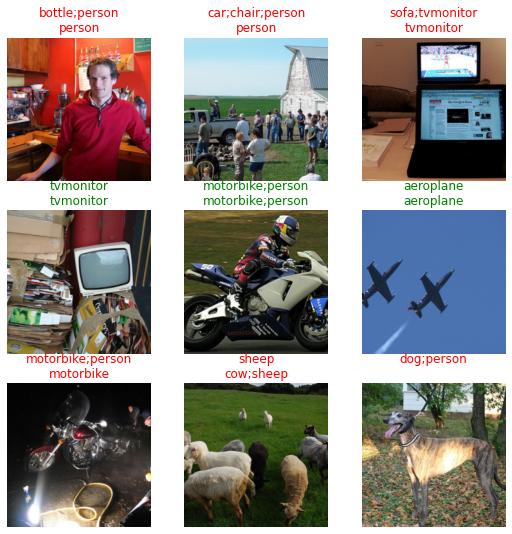

In [ ]:
learn.show_results()

In [ ]:
learn.predict(path/'train/000005.jpg')

((#1) ['chair'],
 TensorBase([False, False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False, False]),
 TensorBase([6.8007e-04, 1.5396e-03, 5.7576e-04, 2.6329e-04, 4.8271e-02, 3.0897e-04,
         1.2893e-03, 4.8475e-03, 9.3714e-01, 1.1416e-04, 4.9849e-01, 7.5701e-03,
         6.6040e-04, 9.5830e-05, 3.4039e-01, 1.4743e-01, 3.0706e-05, 1.5345e-01,
         2.0855e-04, 2.0643e-01]))

In [ ]:
img = Image.open(path/'train/000005.jpg')

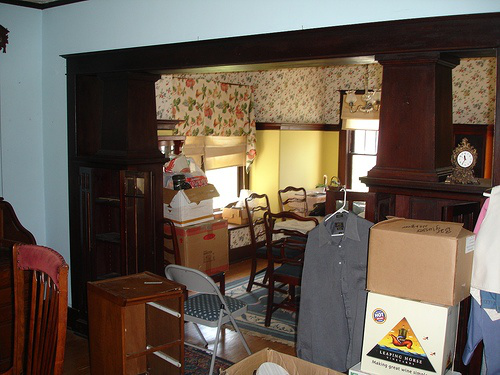

In [ ]:
img

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


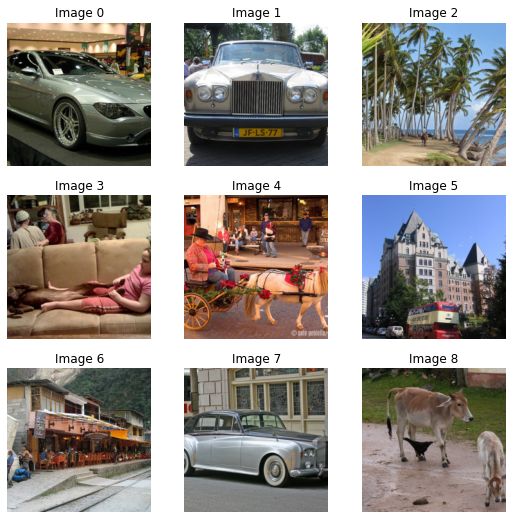

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

##Segmentation

In [ ]:
!pip install fastai --upgrade

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images')]

In [ ]:
np.loadtxt(path/'codes.txt', dtype = str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [ ]:
pd.read_csv(path/"codes.txt")

Animal
0             Archway
1           Bicyclist
2              Bridge
3            Building
4                 Car
5     CartLuggagePram
6               Child
7         Column_Pole
8               Fence
9        LaneMkgsDriv
10    LaneMkgsNonDriv
11          Misc_Text
12  MotorcycleScooter
13        OtherMoving
14       ParkingBlock
15         Pedestrian
16               Road
17       RoadShoulder
18           Sidewalk
19         SignSymbol
20                Sky
21     SUVPickupTruck
22        TrafficCone
23       TrafficLight
24              Train
25               Tree
26          Truck_Bus
27             Tunnel
28     VegetationMisc
29               Void
30               Wall

In [ ]:
(path/"labels").ls()

(#100) [Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08280_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03090_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06570_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f01710_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03060_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008700_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_006750_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008940_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f03720_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01440_P.png')...]

In [ ]:
img  = Image.open((path/"labels").ls()[50])

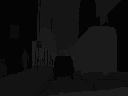

In [ ]:
img

In [ ]:
(path/"images").ls()[50]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_08085.png')

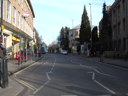

In [ ]:
Image.open((path/"images").ls()[99])

In [ ]:
def lf(fil)

In [ ]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes = np.loadtxt(path/'codes.txt', dtype=str))),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    batch_tfms=aug_transforms())

In [ ]:
dls = camvid.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


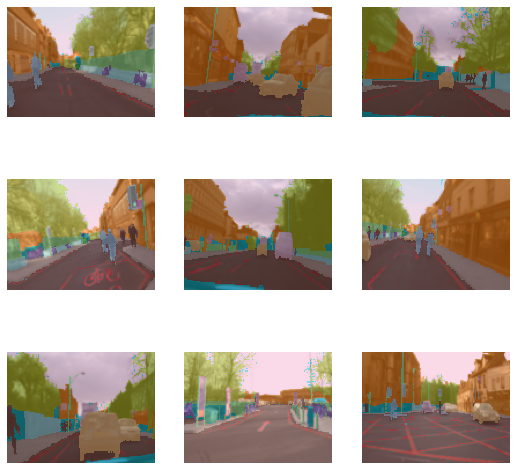

In [ ]:
dls.show_batch()

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


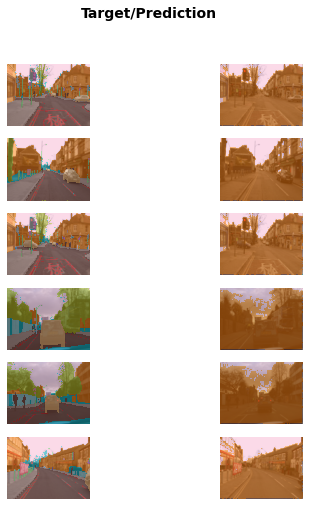

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


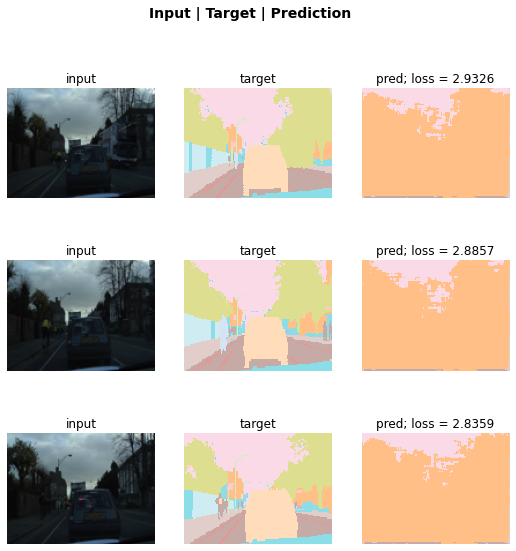

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

##Points

In [ ]:
!pip install fastai --upgrade

In [6]:
from fastai.vision.all import *

In [7]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [8]:
path.ls()

(#50) [Path('/root/.fastai/data/biwi_head_pose/19.obj'),Path('/root/.fastai/data/biwi_head_pose/03.obj'),Path('/root/.fastai/data/biwi_head_pose/19'),Path('/root/.fastai/data/biwi_head_pose/16'),Path('/root/.fastai/data/biwi_head_pose/17'),Path('/root/.fastai/data/biwi_head_pose/08'),Path('/root/.fastai/data/biwi_head_pose/11'),Path('/root/.fastai/data/biwi_head_pose/21.obj'),Path('/root/.fastai/data/biwi_head_pose/22'),Path('/root/.fastai/data/biwi_head_pose/05')...]

In [9]:
(path/'01').ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00053_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00006_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00303_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00369_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00352_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00373_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00096_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00244_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00464_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00441_pose.txt')...]

In [10]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/19/frame_00373_pose.txt')

In [11]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

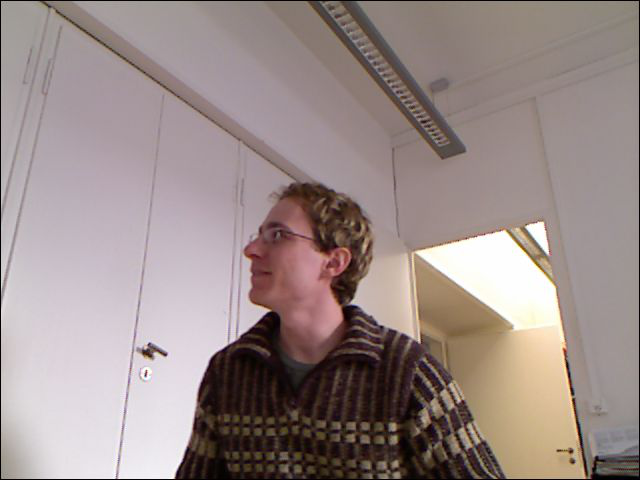

In [12]:
im

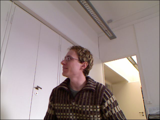

In [13]:
im.to_thumb(160)

In [14]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])


In [15]:
get_ctr(img_files[0])

tensor([291.4657, 245.7938])

In [16]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

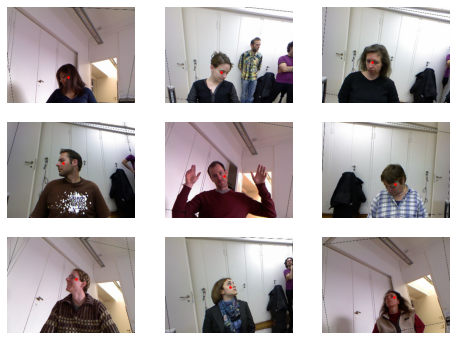

In [17]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

In [18]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0003311311302240938)

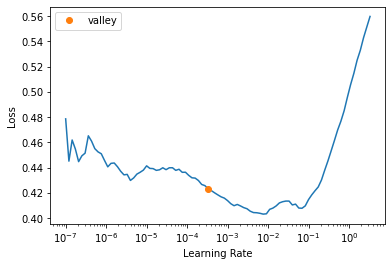

In [19]:
learn.lr_find()

In [20]:
learn.fine_tune(1, 5e-3)

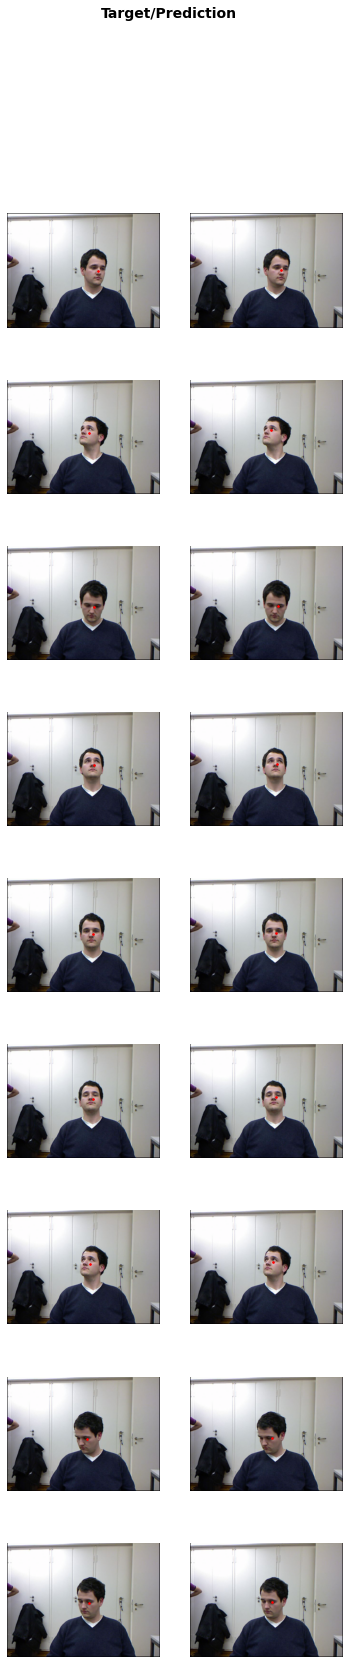

In [21]:
learn.show_results()